# Tarea adicional.

En este ejercicio se tratará de ver más claramente la información arrojada por el MCA, ya que en la tarea sobre los niños enfermos por comida, la visualización era muy difícil.

Habiendo dicho esto, leemos nuestra base de datos.

In [1]:
library(readxl)
library(kableExtra)
autos_completo<-suppressMessages(read_excel("~/datasets/Autos completo.xlsx", sheet="Sheet1"))
head(autos_completo, n=5)

Sexo,Edocivil,Tam,Origen,Tipo,Edad
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Hombre,Casado(a),Grande,Americano,Familiar,34
Hombre,Soltero(a),Compacto,Japonés,Deportivo,36
Hombre,Casado(a),Compacto,Japonés,Familiar,23
Hombre,Soltero(a),Grande,Americano,Familiar,29
Hombre,Casado(a),Mediano,Americano,Familiar,39


Vemos cómo se distribuyen nuestras variables.

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
grafico_frecuencias<-autos_completo %>%
  gather() %>% # Convertimos de wide a long.
  ggplot(aes(x=value, fill=key)) +
    geom_bar(stat = "count") + # hacemos el gráfico por frecuencia
    facet_wrap(~ key, scales = "free") + # Graficamos por variable
    theme(legend.position = "none") + # Eliminamos la leyenda de colores.
    labs(
      title = ""
      ,x = element_blank()
      ,y = "concentración"
    )


Attaching package: 'dplyr'

The following object is masked from 'package:kableExtra':

    group_rows

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



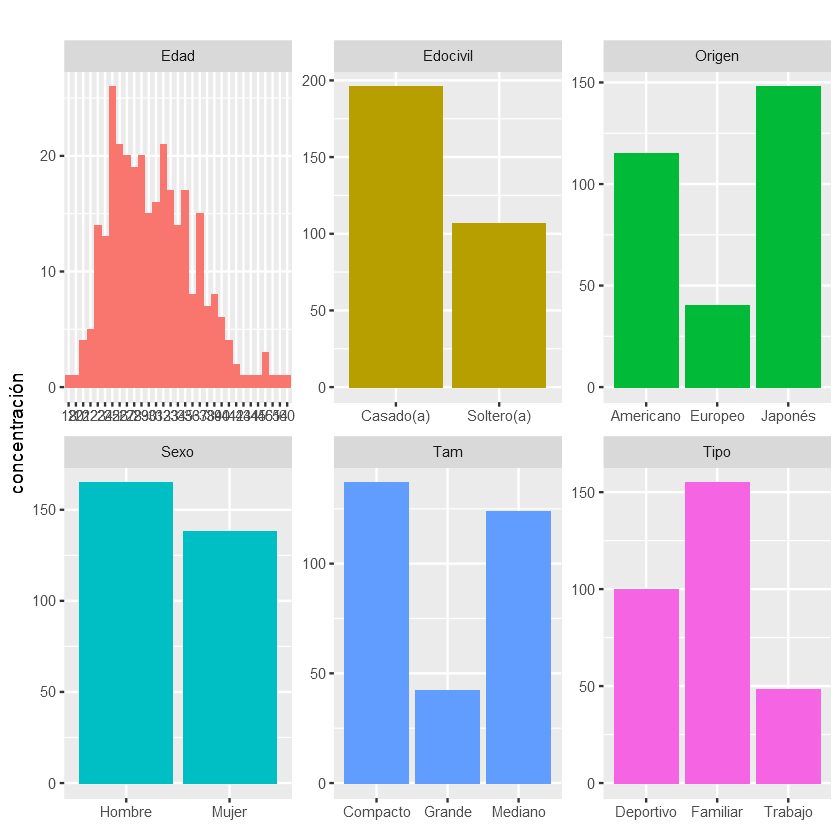

In [3]:
grafico_frecuencias

Como podemos apreciar en el gráfico @ref(fig:graficofreq) hay casi el doble de casados que solteros, hay más autos japoneses que de los demás fabricantes, además que hay un bajo número de autos grandes y que hay pocos autos de trabajo.

Sin embargo, no se alcanza a apreciar bien la distribución de las edades de las personas, por lo cual hacemos de nuevo el gráfico, pero sólo para esa variable (grafico @ref(fig:graEdades)).

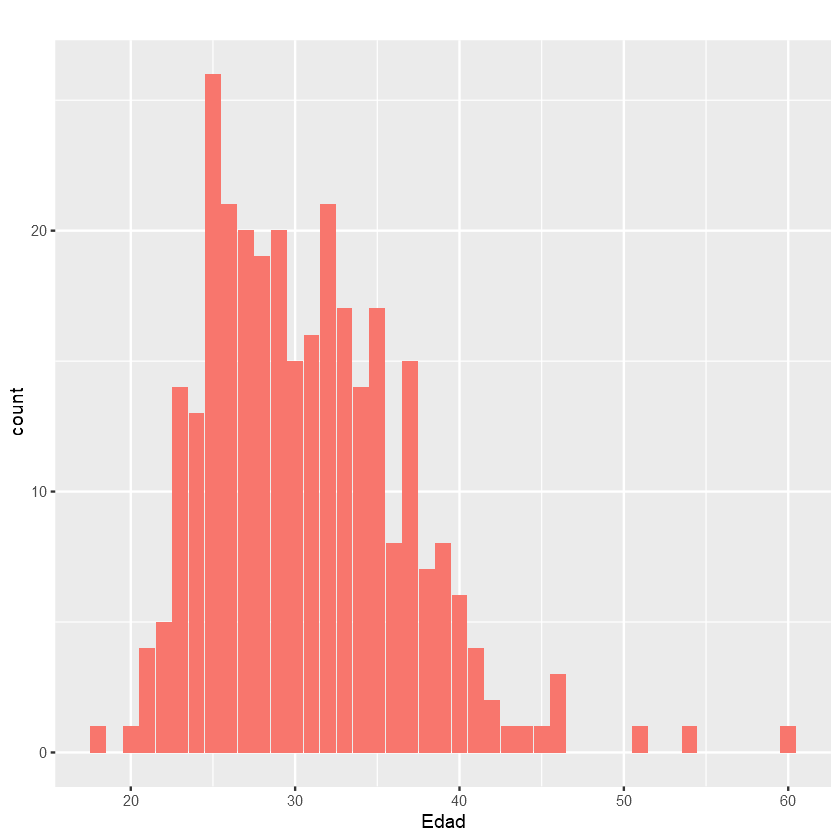

In [4]:
library(ggplot2)
grafico_edades <- ggplot(data=autos_completo, aes(x=Edad, fill="#4682B4")) +
  geom_bar(stat = "count") +
  theme(legend.position = "none") +
  labs(title = "")
grafico_edades


En el gráfico @ref(fig:graEdades) vemos que la edad está distribuida mayormente entre 20 y 40 años. Siendo una muestra de gente relativamente joven.

A continuación, como sólo queremos saber información sobre los automóviles, calculamos la matriz de Burt de sus características.

In [5]:
library(kableExtra)
library(dplyr)
autos_completo %>%
  # Seleccionamos todas las columnas, menos Edad, Sexo y Edo Civil
  select(everything(), -c(Edad, Sexo, Edocivil)) %>% 
  # Convertimos los datos a matriz
  as.matrix() %>%
  # Calculamos la matriz de Burt
  GDAtools::burt() # %>%
  # Formateamos la matriz de Burt.
  #kable() %>%
  # Le ponemos estilo bonis.
  #kable_styling(bootstrap_options = "striped",
  #  full_width = F,
  #  position = "left",
  #  latex_options="scale_down"
  #)

,Tam.Compacto,Tam.Grande,Tam.Mediano,Origen.Americano,Origen.Europeo,Origen.Japonés,Tipo.Deportivo,Tipo.Familiar,Tipo.Trabajo
Tam.Compacto,137,0,0,26,19,92,62,49,26
Tam.Grande,0,42,0,36,4,2,1,30,11
Tam.Mediano,0,0,124,53,17,54,37,76,11
Origen.Americano,26,36,53,115,0,0,23,74,18
Origen.Europeo,19,4,17,0,40,0,21,15,4
Origen.Japonés,92,2,54,0,0,148,56,66,26
Tipo.Deportivo,62,1,37,23,21,56,100,0,0
Tipo.Familiar,49,30,76,74,15,66,0,155,0
Tipo.Trabajo,26,11,11,18,4,26,0,0,48


En la tabla anterior se observa que casi todos los autos americanos son grandes, que una gran parte de los autos compactos son japoneses. También se observa que los autos europeos están distribuidos entre compacto y sedán; pero que sólo aporta 4 autos grandes.

Hacemos la prueba de independencia:

In [6]:
library(FactoMineR)
library(dplyr)
car_autos <- autos_completo %>%
  select(everything(), -c(Edad, Sexo, Edocivil))
chi_autos <- catdes(donnee=car_autos, num.var = 1)$test.chi
chi_autos

,p.value,df
Origen,1.360534e-13,4
Tipo,9.990869e-08,4


En la tabla anterior se puede ver que se necesitan entre 3 y 4 dimensiones para explicar en mayor parte la varianza del modelo.

In [7]:
library(FactoMineR)
library(kableExtra)
autos_completo_mca <- MCA(autos_completo, quanti.sup=6, quali.sup=c(1,2), graph=F)
autos_completo_mca$eig[,2:3]

,percentage of variance,cumulative percentage of variance
dim 1,27.865030,27.86503
dim 2,19.805934,47.67096
dim 3,17.433098,65.10406
dim 4,13.821330,78.92539
dim 5,12.539831,91.46522
dim 6,8.534778,100.00000


In [8]:
library(factoextra)
grafico4<-fviz_mca_biplot(
  autos_completo_mca,
  col.var = "contrib",
  gradient.cols = c('#FFBD5A', '#F22D0F'),
  axes = c(1,2),
  col.ind = "#D3D3D3",
  shape.ind = 1, 
  shape.var = 4
) + labs(title = "")

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


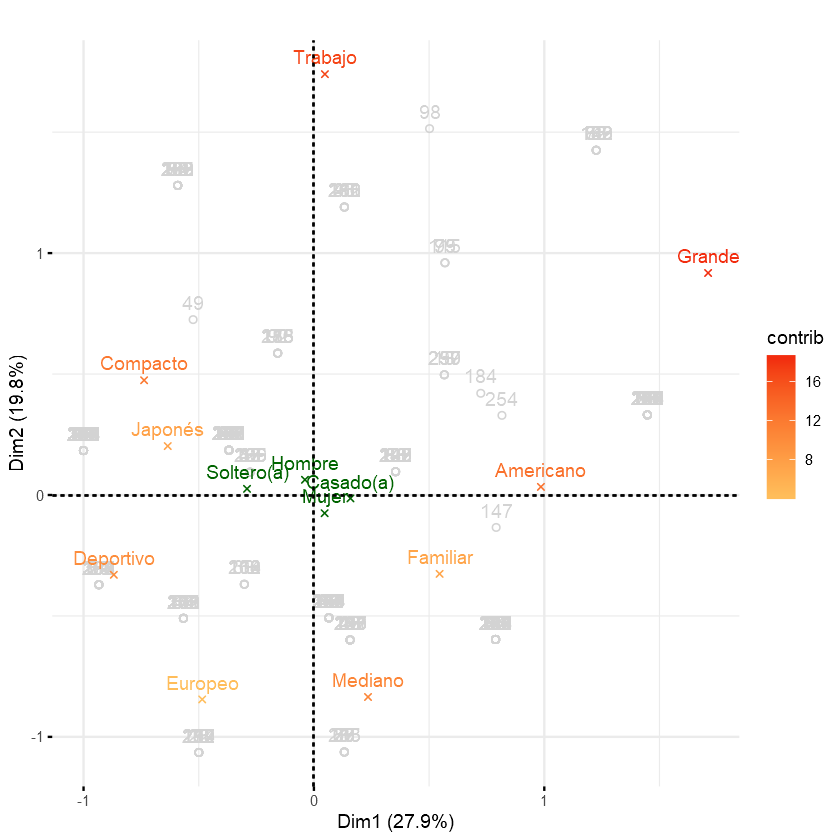

In [9]:
grafico4

En el gráfico @ref(fig:grVar) vemos que la primera dimensión separa principalmente el origen del automóvil así como también permite discernir entre el estado civil del comprador.

Para finalizar, se concluye lo siguiente:

  - Los automóviles compactos de la encuesta son japoneses, con algunas características deportivas.
  - Los automóviles europeos, son principalmente deportivos, compartidos con los fabricantes japoneses.
  - Los automóviles americanos son los de mayor tamaño.
  - Los automóviles de trabajo son de diferentes países, pero se ve una asociación entre el tamaño compacto y el mediano